# Support Vector Machines (SVM) (2)

Name: SAI AKHIL SN | Batch Date: 27 Jan 2021

#### Business Problem:
classify the Size_Categorie using SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing


In [2]:
df=pd.read_csv('C:/ExcelrPy/Assignment-17/forestfires.csv')

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
data=df.copy()

In [6]:
data.drop(['month','day'],axis=1,inplace=True)

In [7]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


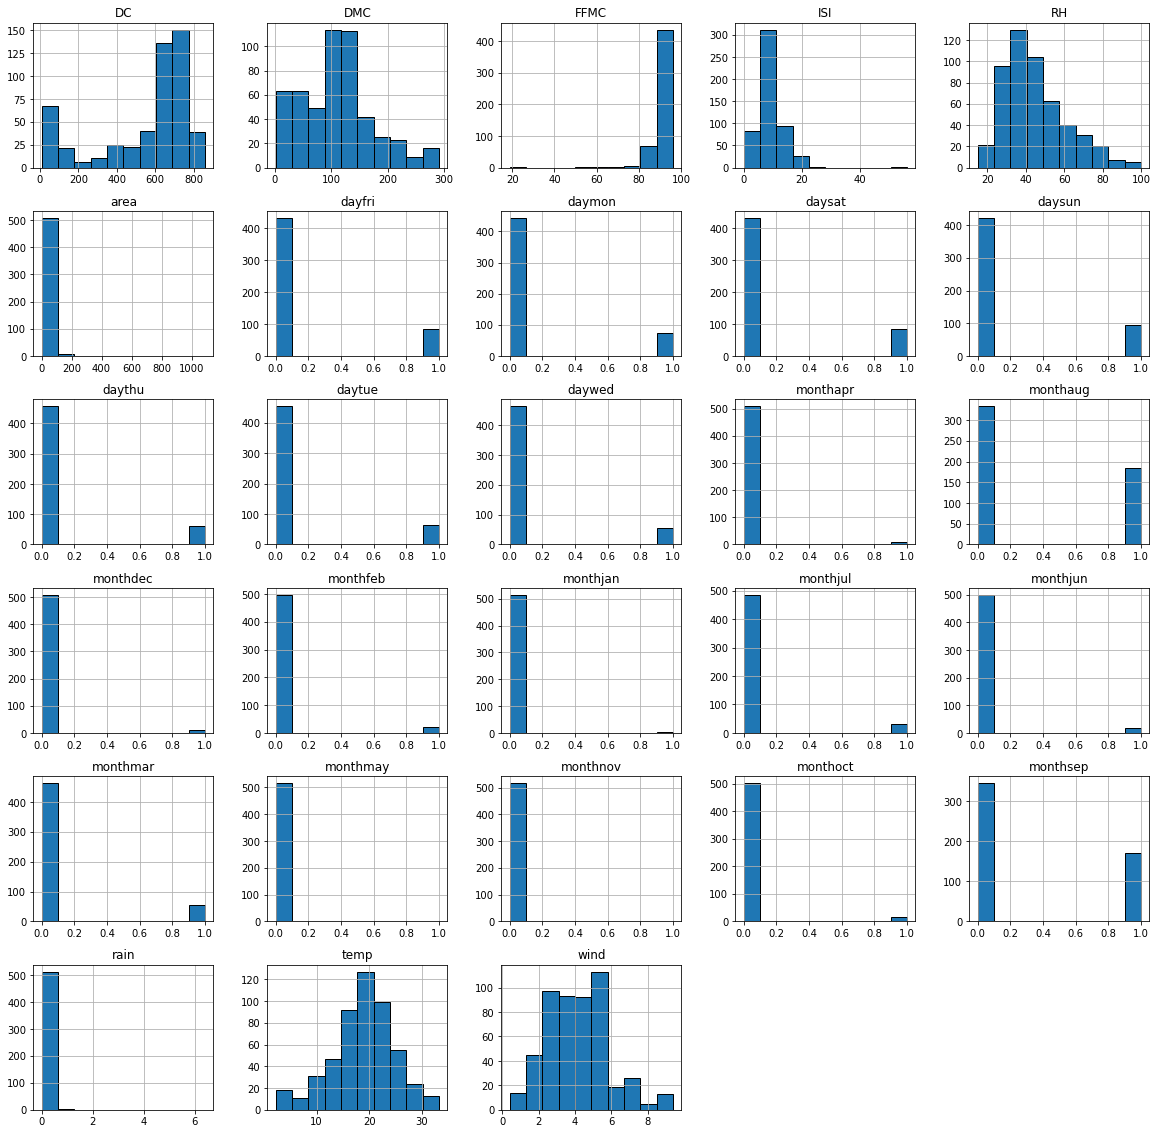

In [14]:
import seaborn as sns
data.hist(edgecolor='black',figsize=(20,20),linewidth=1) 
plt.show()

### Standardisation

In [8]:
data.iloc[:,0:9]=StandardScaler().fit_transform(data.iloc[:,0:9])

In [9]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,small
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,small
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,small
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,small
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,small


In [10]:
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [11]:
le = preprocessing.LabelEncoder()
data['size_category']= le.fit_transform(data['size_category'])

In [12]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,1


### Splitting the data to train and test

In [13]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]


In [14]:
y.value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [23]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)


In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'auto', random_state = 42)
x_resample, y_resample = sm.fit_resample(x, y)
y_df = pd.DataFrame(y_resample)
y_df

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
751,0
752,0
753,0
754,0


In [18]:
y_df.size_category.value_counts()

1    378
0    378
Name: size_category, dtype: int64

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x_resample,y_resample,test_size=0.2, random_state=42) 

In [21]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [22]:
gsv.best_params_ , gsv.best_score_

({'C': 14, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8659016393442622)

In [23]:
clf = SVC(C= 14,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 84.86842105263158


array([[61, 13],
       [10, 68]], dtype=int64)

In [24]:
# Training accuracy
clf = SVC(C= 14,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_train, y_pred)

Accuracy = 99.33774834437085


array([[301,   3],
       [  1, 299]], dtype=int64)

In [ ]:
print(classification_report(y_test,y_pred))

### Applying PCA

In [25]:
pdata=data.copy()

In [26]:
pdata.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,1


In [27]:
from sklearn.decomposition import PCA
pca=PCA(random_state=0)
pca_values=pca.fit_transform(x_resample)

In [28]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var1

array([28.71, 41.57, 53.21, 63.97, 73.47, 79.75, 84.15, 87.7 , 89.76,
       91.41, 92.78, 93.97, 95.06, 96.04, 96.91, 97.67, 98.31, 98.79,
       99.08, 99.31, 99.52, 99.67, 99.8 , 99.88, 99.93, 99.95, 99.97,
       99.98])

In [30]:
x=pd.DataFrame(pca_values[:,0:15])
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,3.400711,0.358027,-0.911600,0.177564,-0.454447,-0.247524,-0.060133,-0.389523,0.068977,0.494481,-0.206403,-0.530228,-0.479629,-0.179611,-0.194805
1,0.228017,-1.132709,0.604415,-0.753955,1.334714,0.457056,-0.678834,0.408845,0.140864,-0.988343,-0.074809,-0.173254,-0.162095,0.650847,-0.534382
2,0.481489,-0.942444,0.649604,-0.659894,1.065319,0.391034,-0.877553,0.180870,0.423052,-0.914843,-0.408616,0.706434,-0.527214,-0.301065,-0.211889
3,2.972740,2.069694,0.134629,0.271887,-0.324948,2.299599,-0.622570,-0.081158,-0.924636,0.564827,-0.444355,-0.683236,-0.236848,-0.134076,-0.011795
4,2.533181,1.386553,1.095384,-0.140963,-0.147163,2.989457,0.018743,0.255862,-1.061376,0.481381,0.525865,0.081912,0.172012,0.048572,0.055545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,-0.893004,-0.390423,0.722535,-0.364536,0.386485,0.030508,-0.818504,0.489748,-0.001949,0.341903,-0.164487,-0.530215,-0.464924,-0.253296,-0.174629
752,-0.053082,2.475472,-0.560877,0.668072,-2.510985,1.357530,-0.241332,0.671977,0.023507,-0.369747,-0.117701,0.034864,0.136247,-0.024957,0.167222
753,0.223745,2.145602,0.054211,0.249623,-1.850480,1.637849,-0.444033,0.426483,0.236066,-0.557041,-0.050423,0.015722,0.007483,-0.036016,0.090347
754,-1.806938,0.868578,0.987447,0.008604,-0.743031,-0.679311,0.842868,-1.091898,0.530877,0.052730,0.026900,-0.023888,0.009721,0.000699,-0.102587


In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y_resample,test_size=0.2, random_state=0) 

In [48]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,0.1,0.01],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5, 0.1, 0.01],
                          'kernel': ['rbf']}])

In [49]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}, 0.9436612021857924)

In [45]:
clf = SVC(C= 15,gamma = 0.1,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 93.42105263157895


array([[75,  6],
       [ 4, 67]], dtype=int64)

In [35]:
clf = SVC(C= 15,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_train, y_pred)

Accuracy = 99.00662251655629


array([[293,   4],
       [  2, 305]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        81
           1       0.92      0.94      0.93        71

    accuracy                           0.93       152
   macro avg       0.93      0.93      0.93       152
weighted avg       0.93      0.93      0.93       152

